Setup

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

# Marsbewoners

In deze opgave gaan we:

-  spreidingsmaten  en centrummaten berekenen in Python voor een dataset
-  een boxplot en histogram uitvoeren in Python en interpreteren.
-  gemiddelde, standaardafwijking, mediaan en kwartielen berekenen en uitschieters detecteren.

## Vraag 1: Marsbewoners

Bekijk het bijgeleverde bestand: 'marsbewoners.txt'.  Hierin staan de lengtes van 10.000 marsbewoners die gemeten werden (in cm) door de mars exploration rovers.  Probeer dit bestand in te laden.

In [220]:
marsbewoners = pd.read_csv("data/marsbewoners.txt", delimiter=" ", decimal=".")

marsbewoners = marsbewoners.stack()

# Reset de index en hernoem de kolommen
marsbewoners = marsbewoners.reset_index(drop=True)

display(marsbewoners)

0       21.08995
1       43.75383
2       39.50759
3       44.50153
4       48.22103
          ...   
9990    94.13283
9991    93.67725
9992    69.96072
9993    60.76466
9994    64.65353
Length: 9995, dtype: float64

Geef antwoord op de volgende vragen:

1. Wat is de gemiddelde lengte van een marsbewoner?

In [221]:
gemiddelde = round(marsbewoners.mean(), 2)

print("Gemiddelde ->", gemiddelde)

Gemiddelde -> 51.95


2. Wat is de mediaan?  Wat betekent dit?

In [222]:
median = round(marsbewoners.median(), 2)

print("De mediaan is het middelpunt van alle data.")
print("Mediaan ->", median)

De mediaan is het middelpunt van alle data.
Mediaan -> 49.04


3. Wat is de gemiddelde absolute afwijking?  Wat betekent dit?

In [223]:
mean = marsbewoners.mean()
# mad = marsbewoners.mad()
mad = (marsbewoners - marsbewoners.mean()).abs().mean()

print("MAD -> " ,mad)
outliers = marsbewoners[(marsbewoners < (mean - mad)) | (marsbewoners  > (mean + mad))]

print("Outliers ->" ,outliers.values)

MAD ->  14.989630409279396
Outliers -> [21.08995 28.34488 17.90599 ... 94.13283 93.67725 69.96072]


4. Wat is de standaardafwijking?  Wat betekent dit?

In [224]:
standaardafwijking = round(marsbewoners.std(), 2)

print("standaardafwijking Is de gemiddelde afwijking tussen datapunten.")
print("Standaardafwijking ->", standaardafwijking)

standaardafwijking Is de gemiddelde afwijking tussen datapunten.
Standaardafwijking -> 17.59


5. Bepaal de kwartielen en de decielen (experimenteer met de kwantielen om dit te vinden)

    - 20% van de marsbewoners is kleiner dan ... cm (gebruik de decielen)
    - Het percentage marsbewoners dat kleiner of gelijk is aan 60 cm is ...

In [225]:
# (1) -> 20% van de marsbewoners is kleiner dan 35.84 cm (gebruik de decielen)
# (1) -> Het percentage marsbewoners dat kleiner of gelijk is aan 60 cm is Q5


kwantiel = marsbewoners.quantile(q = [0.25,0.5,0.75])

print("Kwantiel ->")
print(round(kwantiel, 2))

decielen = marsbewoners.quantile(q = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

print("Decielen ->")
print(round(decielen, 2))

Kwantiel ->
0.25    38.11
0.50    49.04
0.75    66.82
dtype: float64
Decielen ->
0.1    30.48
0.2    35.84
0.3    40.16
0.4    44.32
0.5    49.04
0.6    55.91
0.7    63.35
0.8    69.77
0.9    76.49
dtype: float64


6. Teken een boxplot van de lengte van de marsbewoners.  Welke informatie zie je hier?

Lees nu volgende zaken af op de boxplot:

- Het bereik is ...
- De mediaan ligt tussen...
- Het eerste kwantiel Q1 ligt rond...
- Het derde kwantiel ligt tussen....
- Wanneer spreken we van een outlier (uitschieter)?


Axes(0.125,0.11;0.775x0.77)


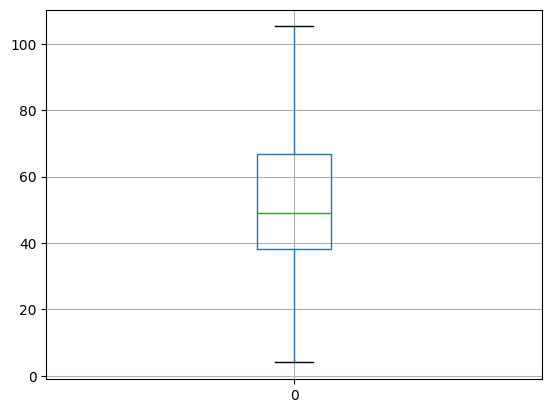

In [226]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

df = pd.DataFrame(marsbewoners)

boxplot = df.boxplot(ax=ax)

print(boxplot)

In [227]:
# (1) Het bereik is                                         -> 0 tot 100 (0% - 100%)
# (2) De mediaan ligt tussen                                -> 40% - 60%
# (3) Het eerste kwantiel Q1 ligt rond                      -> 40%
# (4) Het derde kwantiel ligt tussen                        -> 60% - 80%
# (5) Wanneer spreken we van een outlier (uitschieter)?     -> (Q1 - IQR * 1.5) of (Q3 - IQR * 1.5)

7. Maak klassen van 5 cm en bepaal de frequenties (laat de klassen beginnen bij 0 cm).  Wat is de modus?

In [228]:
cutpoints  = range(0,100,5)

klassen = pd.cut(marsbewoners, bins=cutpoints)

frequenties = klassen.value_counts().sort_index()

modus = marsbewoners.value_counts().idxmax()

print("Modus ->", modus)

Modus -> 39.74918


8. Maak klassen van 5 cm en teken een histogram. Wat zie je?  Hoe zou je dit verklaren?  Zie je dit ook als je klassen maakt van 10 cm?

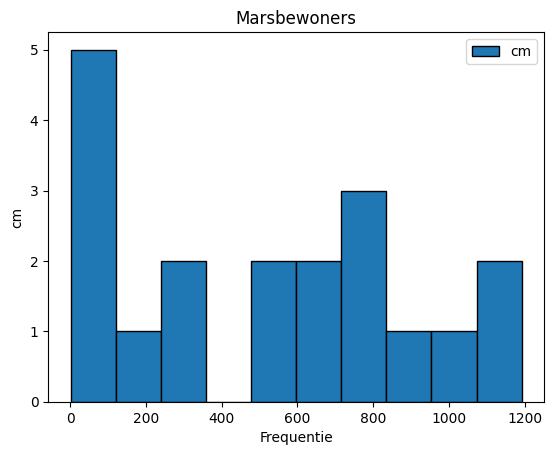

In [229]:
# Er is een duidelijke modus.

cutpoints  = range(0,100,5)

klassen = pd.cut(marsbewoners, bins=cutpoints)

frequenties = klassen.value_counts().sort_index()

fig,axes = plt.subplots()
_=axes.hist(frequenties,edgecolor='black',label='cm')
_=axes.set_title('Marsbewoners')
_=axes.set_xlabel('Frequentie')
_=axes.set_ylabel('cm')
_=axes.legend()

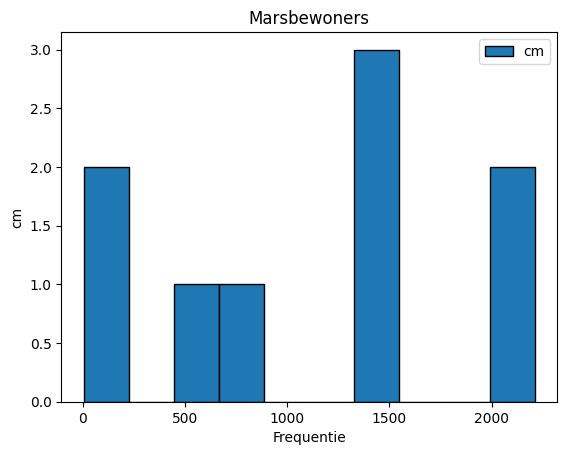

In [230]:
# Ja
cutpoints  = range(0,100,10)

klassen = pd.cut(marsbewoners, bins=cutpoints)

frequenties = klassen.value_counts().sort_index()

fig,axes = plt.subplots()
_=axes.hist(frequenties,edgecolor='black',label='cm')
_=axes.set_title('Marsbewoners')
_=axes.set_xlabel('Frequentie')
_=axes.set_ylabel('cm')
_=axes.legend()

## Vraag 2: Mannelijk en vrouwelijke marsbewoners

Open nu de bestanden 'mannetjes.txt' en 'vrouwtjes.txt'.  Hierin staan de lengtes van dezelfde marsbewoners, maar nu per geslacht.

In [231]:
marsmannetjes = pd.read_csv("data/marsmannetjes.txt", delimiter=" ", decimal=".")

marsmannetjes = marsmannetjes.stack()

# Reset de index en hernoem de kolommen
marsmannetjes = marsmannetjes.reset_index(drop=True)

display(marsmannetjes)

0       71.58202
1       79.32890
2       71.57256
3       59.87172
4       58.05961
          ...   
3990    94.13283
3991    93.67725
3992    69.96072
3993    60.76466
3994    64.65353
Length: 3995, dtype: float64

In [232]:
marsvrouwtjes = pd.read_csv("data/marsvrouwtjes.txt", delimiter=" ", decimal=".")

marsvrouwtjes = marsvrouwtjes.stack()

# Reset de index en hernoem de kolommen
marsvrouwtjes = marsvrouwtjes.reset_index(drop=True)

display(marsvrouwtjes)

0       21.08995
1       43.75383
2       39.50759
3       44.50153
4       48.22103
          ...   
5990    31.78196
5991    35.48659
5992    24.81928
5993    45.02553
5994    30.99566
Length: 5995, dtype: float64

Geef antwoord op de volgende vragen:

9. Wat zijn de gemiddelde lengtes van een marsmannetje en een marsvrouwtje?

In [233]:
gemiddelde = round(marsmannetjes.mean(), 2)

print("Gemiddelde Marsmannetjes ->", gemiddelde)

gemiddelde = round(marsvrouwtjes.mean(), 2)

print("Gemiddelde Marsvrouwtjes ->", gemiddelde)

Gemiddelde Marsmannetjes -> 69.73
Gemiddelde Marsvrouwtjes -> 40.09


10. Bereken ook de medianen en de standaardafwijkingen

In [234]:
medianen = round(marsmannetjes.median(), 2)

print("Medianen Marsmannetjes ->", medianen)

medianen = round(marsvrouwtjes.median(), 2)

print("Medianen Marsvrouwtjes ->", medianen)

Medianen Marsmannetjes -> 69.71
Medianen Marsvrouwtjes -> 40.17


In [235]:
standaardafwijkingen = round(marsmannetjes.std(), 2)

print("Standaardafwijkingen Marsmannetjes ->", standaardafwijkingen)

standaardafwijkingen = round(marsvrouwtjes.std(), 2)

print("Standaardafwijkingen Marsvrouwtjes ->", standaardafwijkingen)

Standaardafwijkingen Marsmannetjes -> 10.03
Standaardafwijkingen Marsvrouwtjes -> 9.85


11. Bepaal de kwartielen

In [236]:
kwantiel = marsmannetjes.quantile(q = [0.25,0.5,0.75])

print("Kwantiel Marsmannetjes ->")
print(round(kwantiel, 2))

print("\n")

kwantiel = marsvrouwtjes.quantile(q = [0.25,0.5,0.75])

print("Kwantiel Marsvrouwtjes ->")
print(round(kwantiel, 2))

Kwantiel Marsmannetjes ->
0.25    63.00
0.50    69.71
0.75    76.48
dtype: float64


Kwantiel Marsvrouwtjes ->
0.25    33.39
0.50    40.17
0.75    46.77
dtype: float64


12. Maak een boxplot waar je deze twee verdelingen naast elkaar ziet

In [237]:
mar = [marsmannetjes, marsvrouwtjes]
print(mar)

[0       71.58202
1       79.32890
2       71.57256
3       59.87172
4       58.05961
          ...   
3990    94.13283
3991    93.67725
3992    69.96072
3993    60.76466
3994    64.65353
Length: 3995, dtype: float64, 0       21.08995
1       43.75383
2       39.50759
3       44.50153
4       48.22103
          ...   
5990    31.78196
5991    35.48659
5992    24.81928
5993    45.02553
5994    30.99566
Length: 5995, dtype: float64]


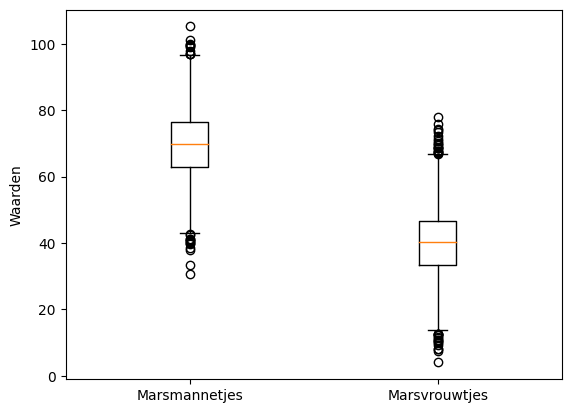

In [238]:
import matplotlib.pyplot as plt

# Maak de boxplot
fig, ax = plt.subplots()
ax.boxplot(mar)

# Stel de labels in
ax.set_xticklabels(['Marsmannetjes', 'Marsvrouwtjes'])
ax.set_ylabel('Waarden')

# Toon de plot
plt.show()

13. Bepaal de grenzen voor uitschieters voor de mannetjes en de vrouwtjes. Welke waarden zijn er telkens uitschieters?  Zijn er extreme uitschieters?  Welk zijn de grenzen daarvoor?

In [239]:
Q1 = marsmannetjes.quantile(0.25)
Q3 = marsmannetjes.quantile(0.75)
IQR = Q3 - Q1

outliers = marsmannetjes[(marsmannetjes <  (Q1 - 1.5 *  IQR)) | (marsmannetjes  > (Q3 +  1.5 * IQR))]

extreme_outliers =  marsmannetjes[(marsmannetjes < (Q1 - 3 * IQR)) | (marsmannetjes > (Q3 + 3 * IQR))]


print("IQR-> ", round(IQR, 2))
print("Outliers max -> ", round(outliers.max() , 2))
print("Outliers min -> ", round(outliers.min() , 2))
print("Extreme_outliers max-> ", round(extreme_outliers.max(), 2))
print("Extreme_outliers min-> ", round(extreme_outliers.min(), 2))

IQR->  13.48
Outliers max ->  105.18
Outliers min ->  30.66
Extreme_outliers max->  nan
Extreme_outliers min->  nan


In [240]:
Q1 = marsvrouwtjes.quantile(0.25)
Q3 = marsvrouwtjes.quantile(0.75)
IQR = Q3 - Q1

outliers = marsvrouwtjes[(marsvrouwtjes <  (Q1 - 1.5 *  IQR)) | (marsvrouwtjes  > (Q3 +  1.5 * IQR))]

extreme_outliers =  marsvrouwtjes[(marsvrouwtjes < (Q1 - 3 * IQR)) | (marsvrouwtjes > (Q3 + 3 * IQR))]


print("IQR-> ", round(IQR, 2))
print("Outliers max -> ", round(outliers.max() , 2))
print("Outliers min -> ", round(outliers.min() , 2))
print("Extreme_outliers max-> ", round(extreme_outliers.max(), 2))
print("Extreme_outliers min-> ", round(extreme_outliers.min(), 2))

IQR->  13.38
Outliers max ->  77.85
Outliers min ->  4.04
Extreme_outliers max->  nan
Extreme_outliers min->  nan


14. Bereken het meetkundig gemiddelde van de mannetjes. Heeft dit hier nut?

In [241]:
# ?

marsmannetjes = marsmannetjes / 100 + 1

meetkundig_gemiddelde = (np.exp(np.mean(np.log(marsmannetjes))) - 1) * 100

print("Meetkundig gemiddelde -> ", meetkundig_gemiddelde)

Meetkundig gemiddelde ->  69.430905879538


15. Bereken het harmonisch gemiddlede van de vrouwtjes. Heeft dit hier nut?

In [242]:
# ?

harmonisch_gemiddlede = 1 / np.mean(1 / marsvrouwtjes)

print("Harmonisch gemiddlede -> ", harmonisch_gemiddlede)

Harmonisch gemiddlede ->  37.2024864328112
